In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [28]:
# test the table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
end_date

datetime.datetime(2017, 8, 23, 0, 0)

2016-08-23


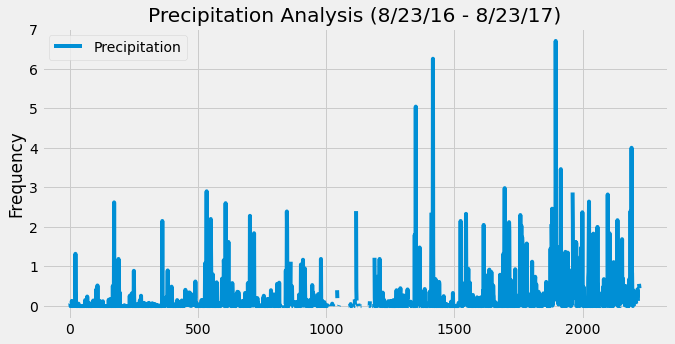

In [70]:
# Calculate the date one year from the last date in data set.

one_year_ago = dt.date(2017,8,23)-dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores

precip_data = [measurement.date, measurement.prcp]
query_result = session.query(*precip_data).filter(measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query_result, columns=['Date','Precipitation'])


# Sort the dataframe by date
precipitation_df.set_index('Date').head()

# Use Pandas Plotting with Matplotlib to plot the data

ax = precipitation_df.plot(figsize=(10,5))
ax.set_title("Precipitation Analysis (8/23/16 - 8/23/17)")
ax.set_ylabel("Frequency")
plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(measurement).group_by(measurement.station).count()
locations

9

In [77]:
# # Design a query to find the most active stations (i.e. what stations have the most rows?)
# # List the stations and the counts in descending order.
active_stations = session.query(measurement.station, 
                func.count(measurement.station).label('count DESC')).\
                group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station,
                            func.count(measurement.station).\
                            label('count DESC')).\
                            group_by(measurement.station).\
                            order_by(func.count(measurement.station).desc()).limit(1)[0][0]
most_active

'USC00519281'

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = [func.min(measurement.tobs),
                func.max(measurement.tobs),
                func.avg(measurement.tobs)]
session.query(*temperature).filter(measurement.station==most_active).all()


[(54.0, 85.0, 71.66378066378067)]

In [76]:
observation = session.query(measurement.tobs).filter(measurement.station==most_active).filter(measurement.date >=one_year_ago)


# Close session

In [36]:
# Close Session
session.close()